## Chapter 1 ###

In [7]:
getwd() # 获取当前工作目录

[1] "/Users/mac/myPrograme/introTS"

In [9]:
setwd("~/GitDoc/introTS/chap1/") # 改变工作目录

In [13]:
library(quantmod)   # Load the package

In [17]:
getSymbols("AAPL")  # Download daily prices of Apple stock from Yahoo

ERROR: Error in curl::curl_fetch_memory(cu, handle = h): Operation was aborted by an application callback


In [ ]:
dim(AAPL)  # (dimension): See the size of the downloaded data.

In [ ]:
head(AAPL)  # See the first 6 rows of the data

In [ ]:
tail(AAPL)   # See the last 6 rows of the data 

In [ ]:
chartSeries(AAPL,theme="white")  # Plot the daily price and volume

In [ ]:
chartSeries(AAPL)#Not shown giving the same plot with black background.

In [16]:
getSymbols("AAPL",from="2005-01-02", to="2010-12-31",auto.assign = getOption('getSymbols.auto.assign',TRUE))
head(AAPL)

ERROR: Error in curl::curl_fetch_memory(cu, handle = h): Timeout was reached: [finance.yahoo.com] Operation timed out after 10005 milliseconds with 0 out of 0 bytes received


In [15]:
getSymbols("UNRATE",src="FRED")#Download unemployment rates from FRED.
head(UNRATE)

[1] "UNRATE"

           UNRATE
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
1948-06-01    3.6

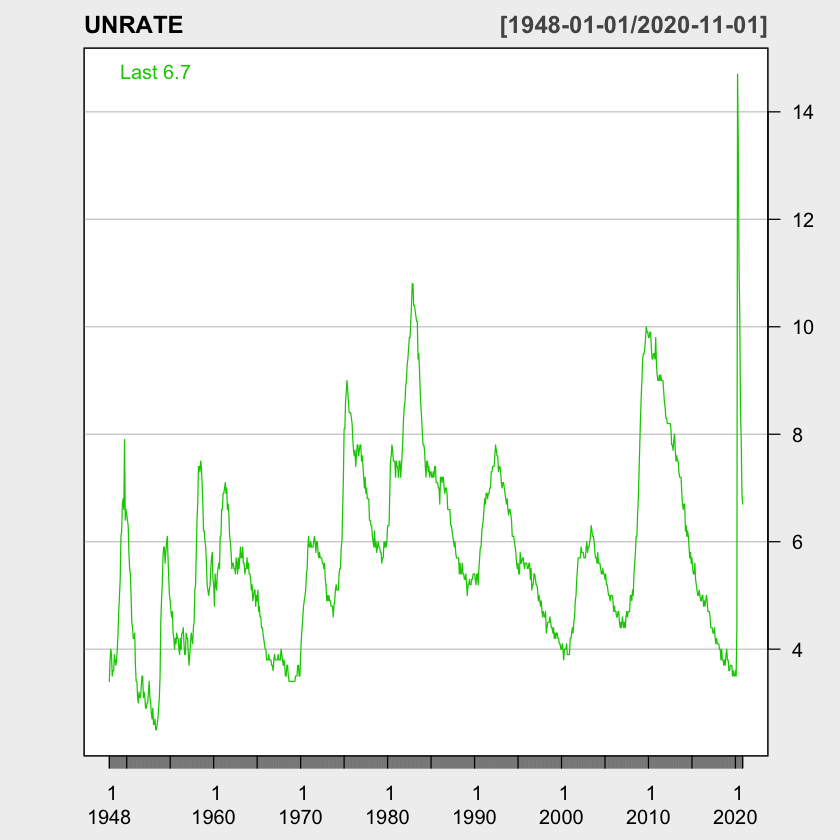

In [18]:
chartSeries(UNRATE,theme="white")  # Plot monthly unemployment rates

In [19]:
getSymbols("INTC",src="google")  # Download data from Google.

ERROR: Error: ‘getSymbols.google’ is defunct.
Google Finance stopped providing data in March, 2018.
You could try setting src = "yahoo" instead.
See help("Defunct") and help("quantmod-defunct")


In [20]:
getSymbols("INTC",src="yahoo")  

ERROR: Error in curl::curl_fetch_memory(query.srv, handle = h$ch): Timeout was reached: [query2.finance.yahoo.com] Operation timed out after 10000 milliseconds with 0 out of 0 bytes received


In [ ]:
head(INTC)

In [22]:
getSymbols("^TNX",auto.assign = getOption('getSymbols.auto.assign',TRUE)) # Download CBOE 10-year Treasures Notes
head(TNX)  

ERROR: Error in curl::curl_fetch_memory(cu, handle = h): Operation was aborted by an application callback


In [ ]:
chartSeries(TNX,theme="white",TA=NULL) # Obtain plot without volume.
#
 # Set my working directory
library(fBasics) # Load package
da=read.table('d-ibm-0110.txt',header=T) # Load text data with names.
head(da) # See the first 6 rows
dim(da)  # Dimension of the data object "da".
da <- read.csv("d-vix0411.txt",header=T) # Load csv data with names.
#
library(quantmod)
getSymbols("AAPL",from="2007-01-03",to="2011-12-02") #Specify period
AAPL.rtn=diff(log(AAPL$AAPL.Adjusted)) # Compute log returns
chartSeries(AAPL.rtn,theme="white")
getSymbols("^TNX",from="2007-01-03",to="2011-12-02")
TNX.rtn=diff(TNX$TNX.Adjusted) # Compute changes
chartSeries(TNX.rtn,theme="white")
getSymbols("DEXUSEU",src="FRED") #Obtain exchange rates from FRED
head(DEXUSEU)
tail(DEXUSEU)
USEU.rtn=diff(log(DEXUSEU$DEXUSEU))
chartSeries(DEXUSEU,theme="white")
chartSeries(USEU.rtn,theme="white")
#
library(fBasics) # Load package
da=read.table("d-mmm-0111.txt",header=T) # Load data
# header=T means the first row of data file contains names.
# deafult is no names.
head(da) #Show the first 6 rows of data
mmm=da[,2]  # Obtain 3m simple returns
basicStats(mmm) #Compute summary statistics
mean(mmm)
var(mmm)
stdev(mmm) # standard deviation
t.test(mmm)  # Testing mean return = 0
s3=skewness(mmm)
T=length(mmm) # Sample size
t3=s3/sqrt(6/T) # Skewness test
pp=2*(1-pnorm(t3)) # Compute p-value
s4=kurtosis(mmm)
t4=s4/sqrt(24/T) # Kurtosis test
normalTest(mmm,method='jb') # JB-test
#
library(fBasics)
da=read.table("d-mmm-0111.txt",header=T) # Load data
mmm=da[,2] # Locate 3M simple returns
hist(mmm,nclass=30) # Histogram
d1=density(mmm)  # Obtain density estimate
range(mmm)  # Range of 3M returns
x=seq(-.1,.1,.001) # Create a sequence of x with increment 0.001.
y1=dnorm(x,mean(mmm),stdev(mmm))
plot(d1$x,d1$y,xlab='rtn',ylab='density',type='l')
lines(x,y1,lty=2)
library(quantmod)
getSymbols("AAPL",from="2011-01-03",to="2011-06-30")
X=AAPL[,1:4] # Locate open, high, low, and close prices
xx=cbind(as.numeric(X[,1]),as.numeric(X[,2]),as.numeric(X[,3]),as.numeric(X[,4]))
source("ohlc.R") # Compile the R script
ohlc_plot(xx,xl="days",yl="price",title="Apple Stock")
source("ma.R")  # Compile R script
getSymbols("AAPL",from="2010-01-02",to="2011-12-08")
x1=as.numeric(AAPL$AAPL.Close) # Locate close price
ma(x1,21)
da=read.table("m-ibmsp-2611.txt",header=T)
head(da)
ibm=log(da$ibm+1) # Transform to log returns
sp=log(da$sp+1)
tdx=c(1:nrow(da))/12+1926 # Create time index
par(mfcol=c(2,1))
plot(tdx,ibm,xlab='year',ylab='lrtn',type='l')
title(main='(a) IBM returns')
plot(tdx,sp,xlab='year',ylab='lrtn',type='l') # X-axis first.
title(main='(b) SP index')
cor(ibm,sp)  # Obtain sample correlation
m1=lm(ibm~sp)  # Fit the Market Model (linear model)
summary(m1)
plot(sp,ibm,cex=0.8)  # Obtain scatter plot
abline(0.008,.807) # Add the linear regression line
#
da=read.table("m-ibmsp-2611.txt",header=T) #Load  data
dim(da)
ibm=log(da$ibm+1) # Compute log returns
sp=log(da$sp+1)
rt=cbind(ibm,sp) # Obtain bivariate returns
m1=apply(rt,2,mean) # Obtain sample means
v1=cov(rt) # Obtain sample covariance matrix
m1
v1
library(mnormt) # Load package
x=rmnorm(1029,mean=m1,varcov=v1) # Simulation
dim(x)
plot(x[,2],x[,1],xlab='sim-sp',ylab='sim-ibm',cex=0.8)

## Chapetr 2 ####

### correlations 相关系数

In [23]:
getwd()

[1] "/Users/mac/GitDoc/introTS/chap1"

In [24]:
setwd("../chap2/")
da=read.table("m-ibmsp6709.txt",header=T)
head(da)

,date,ibm,sp
,<int>,<dbl>,<dbl>
1,19670131,0.075370,0.078178
2,19670228,0.079099,0.001963
3,19670331,0.048837,0.039410
4,19670428,0.100887,0.042239
5,19670531,-0.035234,-0.052441
6,19670630,0.067024,0.017512


In [25]:
ibm=da$ibm
sp5=da$sp

In [26]:
cor(sp5,ibm)

[1] 0.5856544

In [27]:
cor(sp5,ibm,method='spearman')

[1] 0.5860817

In [28]:
cor(sp5,ibm,method='kendall') # 肯德尔相关系数

[1] 0.4196587

In [41]:
### sample ACF

In [29]:
da=read.table("m-dec12910.txt",header=T)
head(da)

,date,dec1,dec2,dec9,dec10
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19670131,0.068568,0.080373,0.180843,0.211806
2,19670228,0.008735,0.011044,0.048767,0.064911
3,19670331,0.039698,0.035364,0.067494,0.068904
4,19670428,0.044030,0.037541,0.040785,0.044602
5,19670531,-0.050631,-0.036233,-0.002191,0.000295
6,19670630,0.014998,0.018870,0.102075,0.118678


In [30]:
d10=da$dec10  # select the Decile 10 returns
dec10=ts(d10,frequency=12,start=c(1967,1))

In [32]:
head(dec10,10)

[1]  0.211806  0.064911  0.068904  0.044602  0.000295  0.118678  0.104800
 [8]  0.011887  0.088675 -0.007511

In [33]:
par(mfcol=c(2,1))

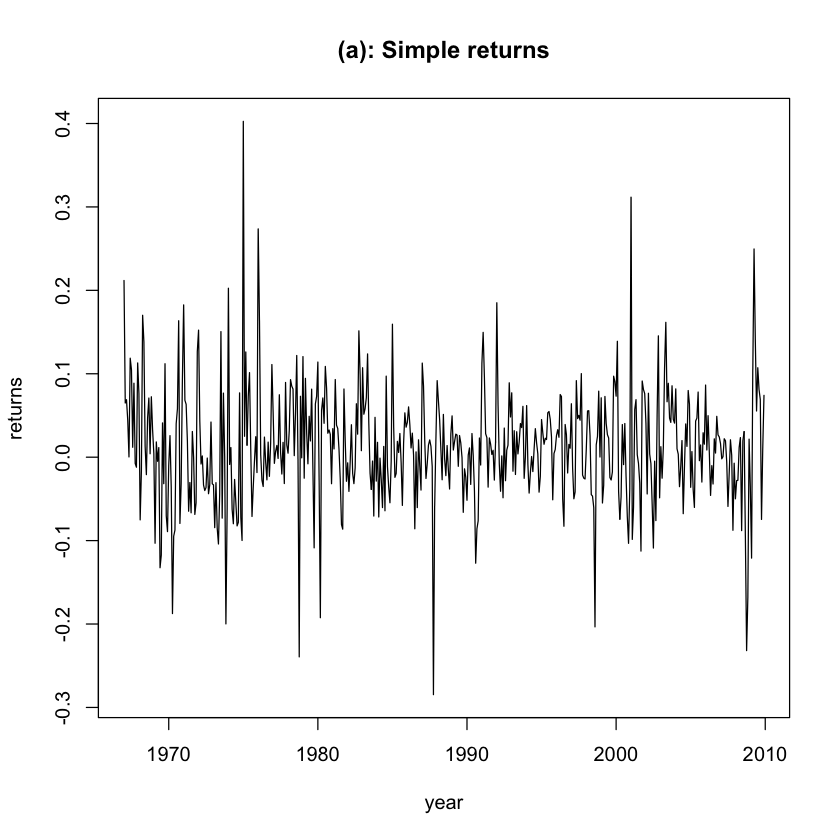

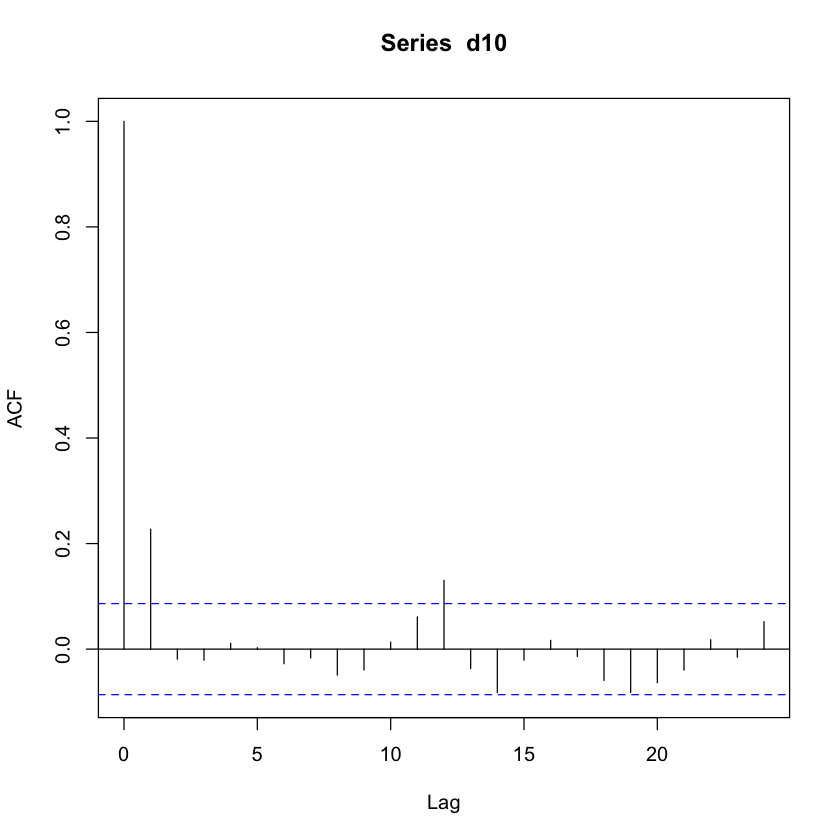

In [34]:
plot(dec10,xlab='year',ylab='returns')
title(main='(a): Simple returns')
acf(d10,lag=24) # command to obtain sample ACF of the data

, , 1

              [,1]
 [1,]  1.000000000
 [2,]  0.227386585
 [3,] -0.019026447
 [4,] -0.021258247
 [5,]  0.011011345
 [6,]  0.002676057
 [7,] -0.027654887
 [8,] -0.016910608
 [9,] -0.049183690
[10,] -0.039617756
[11,]  0.013265549
[12,]  0.061013220
[13,]  0.130411045
[14,] -0.036881195
[15,] -0.082462743
[16,] -0.020950139
[17,]  0.016726386
[18,] -0.013961209
[19,] -0.059422809
[20,] -0.082246074
[21,] -0.063641596
[22,] -0.039858376
[23,]  0.017770989
[24,] -0.015413528
[25,]  0.052212082

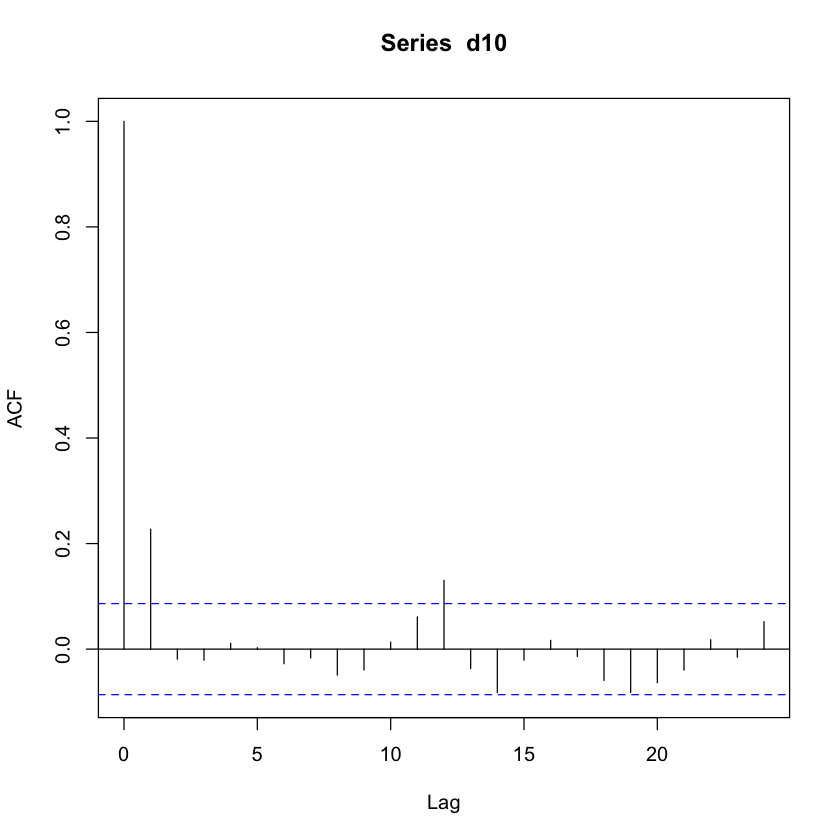

In [35]:
#
f1=acf(d10,lag=24)
f1$acf

In [36]:
tt=f1$acf[13]*sqrt(516)
tt

[1] 2.962369

### Ljung-Box Q statistics :多个自相关系数是否同时为0

In [37]:
da=read.table("m-ibmsp6709.txt",header=T)
ibm=da$ibm

In [38]:
lnibm=log(ibm+1) # Transfer to log returns

In [39]:
Box.test(ibm,lag=12,type='Ljung')


	Box-Ljung test

data:  ibm
X-squared = 7.5666, df = 12, p-value = 0.818


In [40]:
Box.test(lnibm,lag=12,type='Ljung')


	Box-Ljung test

data:  lnibm
X-squared = 7.4042, df = 12, p-value = 0.8298


### AR models

In [42]:
da=read.table("q-gnp4710.txt",header=T)
head(da)

,Year,Mon,Dat,VALUE
,<int>,<int>,<int>,<dbl>
1,1947,1,1,238.1
2,1947,4,1,241.5
3,1947,7,1,245.6
4,1947,10,1,255.6
5,1948,1,1,261.7
6,1948,4,1,268.7


In [43]:
G=da$VALUE
LG=log(G)
gnp=diff(LG)

In [ ]:
dim(da)
tdx=c(1:253)/4+1947 # create the time index
par(mfcol=c(2,1))
plot(tdx,G,xlab='year',ylab='GNP',type='l')
plot(tdx[2:253],gnp,type='l',xlab='year',ylab='growth') 
acf(gnp,lag=12)
pacf(gnp,lag=12) # compute PACF
m1=arima(gnp,order=c(3,0,0))
m1
tsdiag(m1,gof=12)  # model checking discussed later
p1=c(1,-m1$coef[1:3]) # set-up the polynomial
r1=polyroot(p1) # solve the polynomial equation
r1
Mod(r1)
k=2*pi/acos(1.616116/1.832674) # compute length of the period
k
#
mm1=ar(gnp,method='mle')
mm1$order # Find the identified order 
names(mm1)
print(mm1$aic,digits=3)
aic=mm1$aic  # For plotting below.
length(aic)
plot(c(0:12),aic,type='h',xlab='order',ylab='aic')
lines(0:12,aic,lty=2)
#
vw=read.table('m-ibm3dx.txt',header=T)[,3]
t1=prod(vw+1)
t1
t1^(12/996)-1
#
vw=read.table('m-ibm3dx2608.txt',header=T)[,3]
m3=arima(vw,order=c(3,0,0))
m3
(1-.1158+.0187+.1042)*mean(vw)  # Compute the intercept phi(0).
sqrt(m3$sigma2) # Compute standard error of residuals
Box.test(m3$residuals,lag=12,type='Ljung')
pv=1-pchisq(16.35,9) # Compute p value using 9 degrees of freedom
pv
m3=arima(vw,order=c(3,0,0),fixed=c(NA,0,NA,NA)) 
m3
(1-.1136+.1063)*.0089  # compute phi(0)
sqrt(m3$sigma2)  # compute residual standard error
Box.test(m3$residuals,lag=12,type='Ljung')
pv=1-pchisq(16.83,10)
pv
#
da=read.table("m-ibm3dx2608.txt",header=T)
head(da)
ew=da$ewrtn
m1=arima(ew,order=c(0,0,9)) # unrestricted model
m1
m1=arima(ew,order=c(0,0,9),fixed=c(NA,0,NA,0,0,0,0,0,NA,NA))
m1
sqrt(0.005097)
Box.test(m1$residuals,lag=12,type='Ljung')  # model checking
pv=1-pchisq(17.6,9)  # compute p-value after adjusting the d.f.
pv
m1=arima(ew[1:986],order=c(0,0,9),fixed=c(NA,0,NA,0,0,0,0,0,NA,NA))
m1
predict(m1,10) # prediction 
#  EACF table
da=read.table("m-3m4608.txt",header=T)
head(da)
mmm=log(da$rtn+1)
library(TSA)     # Load the package 
m1=eacf(mmm,6,12)      # Simplified table 
print(m1$eacf,digits=2)
#  Unit-root test
library(fUnitRoots)
da=read.table("q-gdp4708.txt",header=T)
gdp=log(da[,4])
m1=ar(diff(gdp),method='mle')
m1$order
adfTest(gdp,lags=10,type=c("c"))
#  Unit root
library(fUnitRoots)
da=read.table("d-sp55008.txt",header=T)
sp5=log(da[,7])
m2=ar(diff(sp5),method='mle') # Based on AIC
m2$order
adfTest(sp5,lags=2,type=("ct"))
adfTest(sp5,lags=15,type=("ct")) # Based on PACF
dsp5=diff(sp5)
tdx=c(1:length(dsp5))
m3=arima(dsp5,order=c(2,0,0),xreg=tdx)
m3
m3$coef
sqrt(diag(m3$var.coef))
tratio=m3$coef/sqrt(diag(m3$var.coef))# compute t-ratio
tratio
#
da=read.table(``d-vix0810.txt'',header=T)
vix=log(da$Close)
length(vix)
m1=arima(vix,order=c(0,1,1))
m1
Box.test(m1$residuals,lag=10,type='Ljung')
pp=1-pchisq(14.25,9)
pp
###  seasonal models
da=read.table("q-ko-earns8309.txt",header=T)
head(da)
eps=log(da$value)
koeps=ts(eps,frequency=4,start=c(1983,1))
plot(koeps,type='l')
points(koeps,pch=c1,cex=0.6) 
par(mfcol=c(2,2))
koeps=log(da$value)
deps=diff(koeps)
sdeps=diff(koeps,4)
ddeps=diff(sdeps)
acf(koeps,lag=20)
acf(deps,lag=20)
acf(sdeps,lag=20)
acf(ddeps,lag=20)
# Obtain time plots
c1=c("2","3","4","1")
c2=c("1","2","3","4")
par(mfcol=c(3,1))
plot(deps,xlab='year',ylab='diff',type='l')
points(deps,pch=c1,cex=0.7)
plot(sdeps,xlab='year',ylab='sea-diff',type='l')
points(sdeps,pch=c2,cex=0.7)
plot(ddeps,xlab='year',ylab='dd',type='l')
points(ddeps,pch=c1,cex=0.7) 
#  Estimation
m1=arima(koeps,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4))
m1
tsdiag(m1,gof=20)  # model checking
Box.test(m1$residuals,lag=12,type='Ljung')
pp=1-pchisq(13.30,10)
pp
koeps=log(da$value)
length(koeps)
y=koeps[1:100]
m1=arima(y,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4))
m1
pm1=predict(m1,7)
names(pm1)
pred=pm1$pred
se=pm1$se
ko=da$value
fore=exp(pred+se^2/2)
v1=exp(2*pred+se^2)*(exp(se^2)-1)
s1=sqrt(v1)
eps=ko[80:107]
length(eps)
tdx=(c(1:28)+3)/4+2002
upp=c(ko[100],fore+2*s1)
low=c(ko[100],fore-2*s1)
min(low,eps)
max(upp,eps)
plot(tdx,eps,xlab='year',ylab='earnings',type='l',ylim=c(0.35,1.3))
points(tdx[22:28],fore,pch='*')
lines(tdx[21:28],upp,lty=2)
lines(tdx[21:28],low,lty=2)
points(tdx[22:28],ko[101:107],pch='o',cex=0.7)
#
da=read.table("m-deciles08.txt",header=T)
d1=da[,2]
jan=rep(c(1,rep(0,11)),39) # Create January dummy.
m1=lm(d1~jan)
summary(m1)
m2=arima(d1,order=c(1,0,0),seasonal=list(order=c(1,0,1),period=12))
m2
tsdiag(m2,gof=36)  # plot not shown.
m2=arima(d1,order=c(1,0,0),seasonal=list(order=c(1,0,1), period=12),include.mean=F)
m2
# regression models with time series errrors
r1=read.table("w-gs1yr.txt",header=T)[,4]
r3=read.table("w-gs3yr.txt",header=T)[,4]
m1=lm(r3~r1)
summary(m1)
plot(m1$residuals,type='l')
acf(m1$residuals,lag=36)
c1=diff(r1)
c3=diff(r3)
m2=lm(c3~-1+c1)
summary(m2)
acf(m2$residuals,lag=36)
m3=arima(c3,order=c(0,0,1),xreg=c1,include.mean=F)
m3
rsq=(sum(c3^2)-sum(m3$residuals^2))/sum(c3^2)
rsq
#  Long memory
library(fracdiff)
da=read.table("d-ibm3dx7008.txt",header=T)
head(da)
ew=abs(da$vwretd)
# obtain Geweke-Port-Hudak estimate using command fdGPH
m3=fdGPH(ew)
m3
m2=fracdiff(ew,nar=1,nma=1)
summary(m2)
# model comparison
da=read.table("q-gdpc96.txt",header=T)
head(da)
gdp=log(da$gdp)
dgdp=diff(gdp)
m1=ar(dgdp,method='mle')
m1$order
m2=arima(dgdp,order=c(3,0,0))
m2
m3=arima(dgdp,order=c(3,0,0),season=list(order=c(1,0,1),period=4))
m3
source("backtest.R")    # Perform backtest
mm2=backtest(m2,dgdp,215,1)
mm3=backtest(m3,dgdp,215,1)
#

In [1]:
py_available()

ERROR: Error in py_available(): 没有"py_available"这个函数
